In [1]:
# download training images
! gdown 17D7NFZ3JaVYXS6fAmO64pKPoN-XfYBW8

Downloading...
From: https://drive.google.com/uc?id=17D7NFZ3JaVYXS6fAmO64pKPoN-XfYBW8
To: /content/archive.zip
100% 648M/648M [00:04<00:00, 146MB/s]


In [ ]:
#download train.csv
! gdown 14PPcWf3fZ40YdFMmcgTykylhdUrvoV0c

Downloading...
From: https://drive.google.com/uc?id=14PPcWf3fZ40YdFMmcgTykylhdUrvoV0c
To: /content/train.csv
100% 6.28M/6.28M [00:00<00:00, 27.7MB/s]


In [ ]:
#download class map corrected and check what it is abaout
! gdown 1o83L_CRahM3kSmmhs3zDkLig6Wtedd2L
#download train_multi diacritics.csv and check
! gdown 10D_SGGgnfFVNlE8I4OtgBCG-eTvmHugD
# sample submission 
! gdown 15YOa3JdK7vL3zDuXkXjGnrTLPwiZR09a

Downloading...
From: https://drive.google.com/uc?id=1o83L_CRahM3kSmmhs3zDkLig6Wtedd2L
To: /content/class_map_corrected.csv
100% 4.87k/4.87k [00:00<00:00, 8.69MB/s]
Downloading...
From: https://drive.google.com/uc?id=10D_SGGgnfFVNlE8I4OtgBCG-eTvmHugD
To: /content/train_multi_diacritics.csv
100% 17.2k/17.2k [00:00<00:00, 21.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=15YOa3JdK7vL3zDuXkXjGnrTLPwiZR09a
To: /content/sample_submission.csv
100% 944/944 [00:00<00:00, 1.34MB/s]


In [ ]:
# imports
import pandas as pd
import tensorflow as tf
import tensorflow.keras as k
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df2 = pd.read_csv('class_map_corrected.csv')
df3 = pd.read_csv('sample_submission.csv')
df4 = pd.read_csv('train_multi_diacritics.csv')

In [ ]:
df2

,component_type,label,component
0,grapheme_root,0,ং
1,grapheme_root,1,ঃ
2,grapheme_root,2,অ
3,grapheme_root,3,আ
4,grapheme_root,4,ই
...,...,...,...
182,consonant_diacritic,3,র্য
183,consonant_diacritic,4,্য
184,consonant_diacritic,5,্র
185,consonant_diacritic,6,্র্য


In [ ]:
df = pd.read_csv('train.csv')
label_layer1 = df["grapheme_root"].to_numpy()
label_layer2 = df["vowel_diacritic"].to_numpy(dtype = np.uint8)
label_layer3 = df["consonant_diacritic"].to_numpy(dtype = np.uint8)

In [ ]:
import zipfile
zf = zipfile.ZipFile('archive.zip')
zf.namelist()
zf.extractall('/content/archive')
#df = pd.read_csv("archive.zip",compression = 'zip')

In [ ]:
from PIL import Image
X = []
for i in range(200840):
  path = "archive/Train_"+str(i)+".png"
  im = Image.open(path)
  im1=im.resize((64,64)) 
  X.append(im1)


NameError: ignored

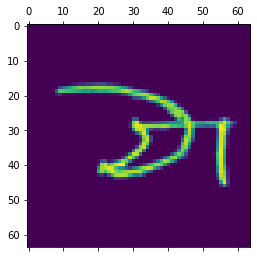

In [ ]:
plt.matshow(X[200156])
print(label_layer[200156])
print(df.loc[[200156]])

In [ ]:
from tensorflow import keras 
import tensorflow as t
input_layer = keras.Input(shape = (64,64,1))
hidden = keras.layers.Conv2D(filters = 32, kernel_size = (5,5),activation = 'relu', padding = 'same')(input_layer)
hidden = keras.layers.Conv2D(filters = 32, kernel_size = (5,5), activation = 'relu', padding = 'same')(hidden)
hidden = keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same')(hidden)
hidden = keras.layers.BatchNormalization()(hidden)
hidden = keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same')(hidden)
hidden - keras.layers.Dropout(rate=0.25)(hidden)
hidden = keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same')(hidden)
hidden = keras.layers.MaxPool2D(2,2)(hidden)
hidden = keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same')(hidden)
hidden = keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same')(hidden)
hidden - keras.layers.Dropout(rate=0.25)(hidden)
hidden = keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same')(hidden)
hidden = keras.layers.BatchNormalization()(hidden)
hidden = keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same')(hidden)
hidden = keras.layers.MaxPool2D(2,2)(hidden)
hidden = keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same')(hidden)
hidden = keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same')(hidden)
hidden = keras.layers.BatchNormalization()(hidden)
hidden = keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same')(hidden)
hidden = keras.layers.MaxPool2D(2,2)(hidden)
flatter = keras.layers.GlobalAveragePooling2D()(hidden)
dropper = keras.layers.Dropout(rate = 0.25)(flatter)
dense0 = keras.layers.Dense(1024, activation = 'relu')(dropper)
dense1 = keras.layers.Dense(512, activation = 'relu')(dense0)
hidden = keras.layers.BatchNormalization()(dense1)
dense2 = keras.layers.Dense(256, activation = 'relu')(hidden)
dense_root = keras.layers.Dense(168, activation = 'softmax')(dense2)
dense_vowel = keras.layers.Dense(11, activation = 'softmax')(dense2)
dense_consonant = keras.layers.Dense(7, activation = 'softmax')(dense2)

In [ ]:
model_multi = keras.Model(inputs = input_layer, outputs = [dense_root,dense_vowel,dense_consonant])

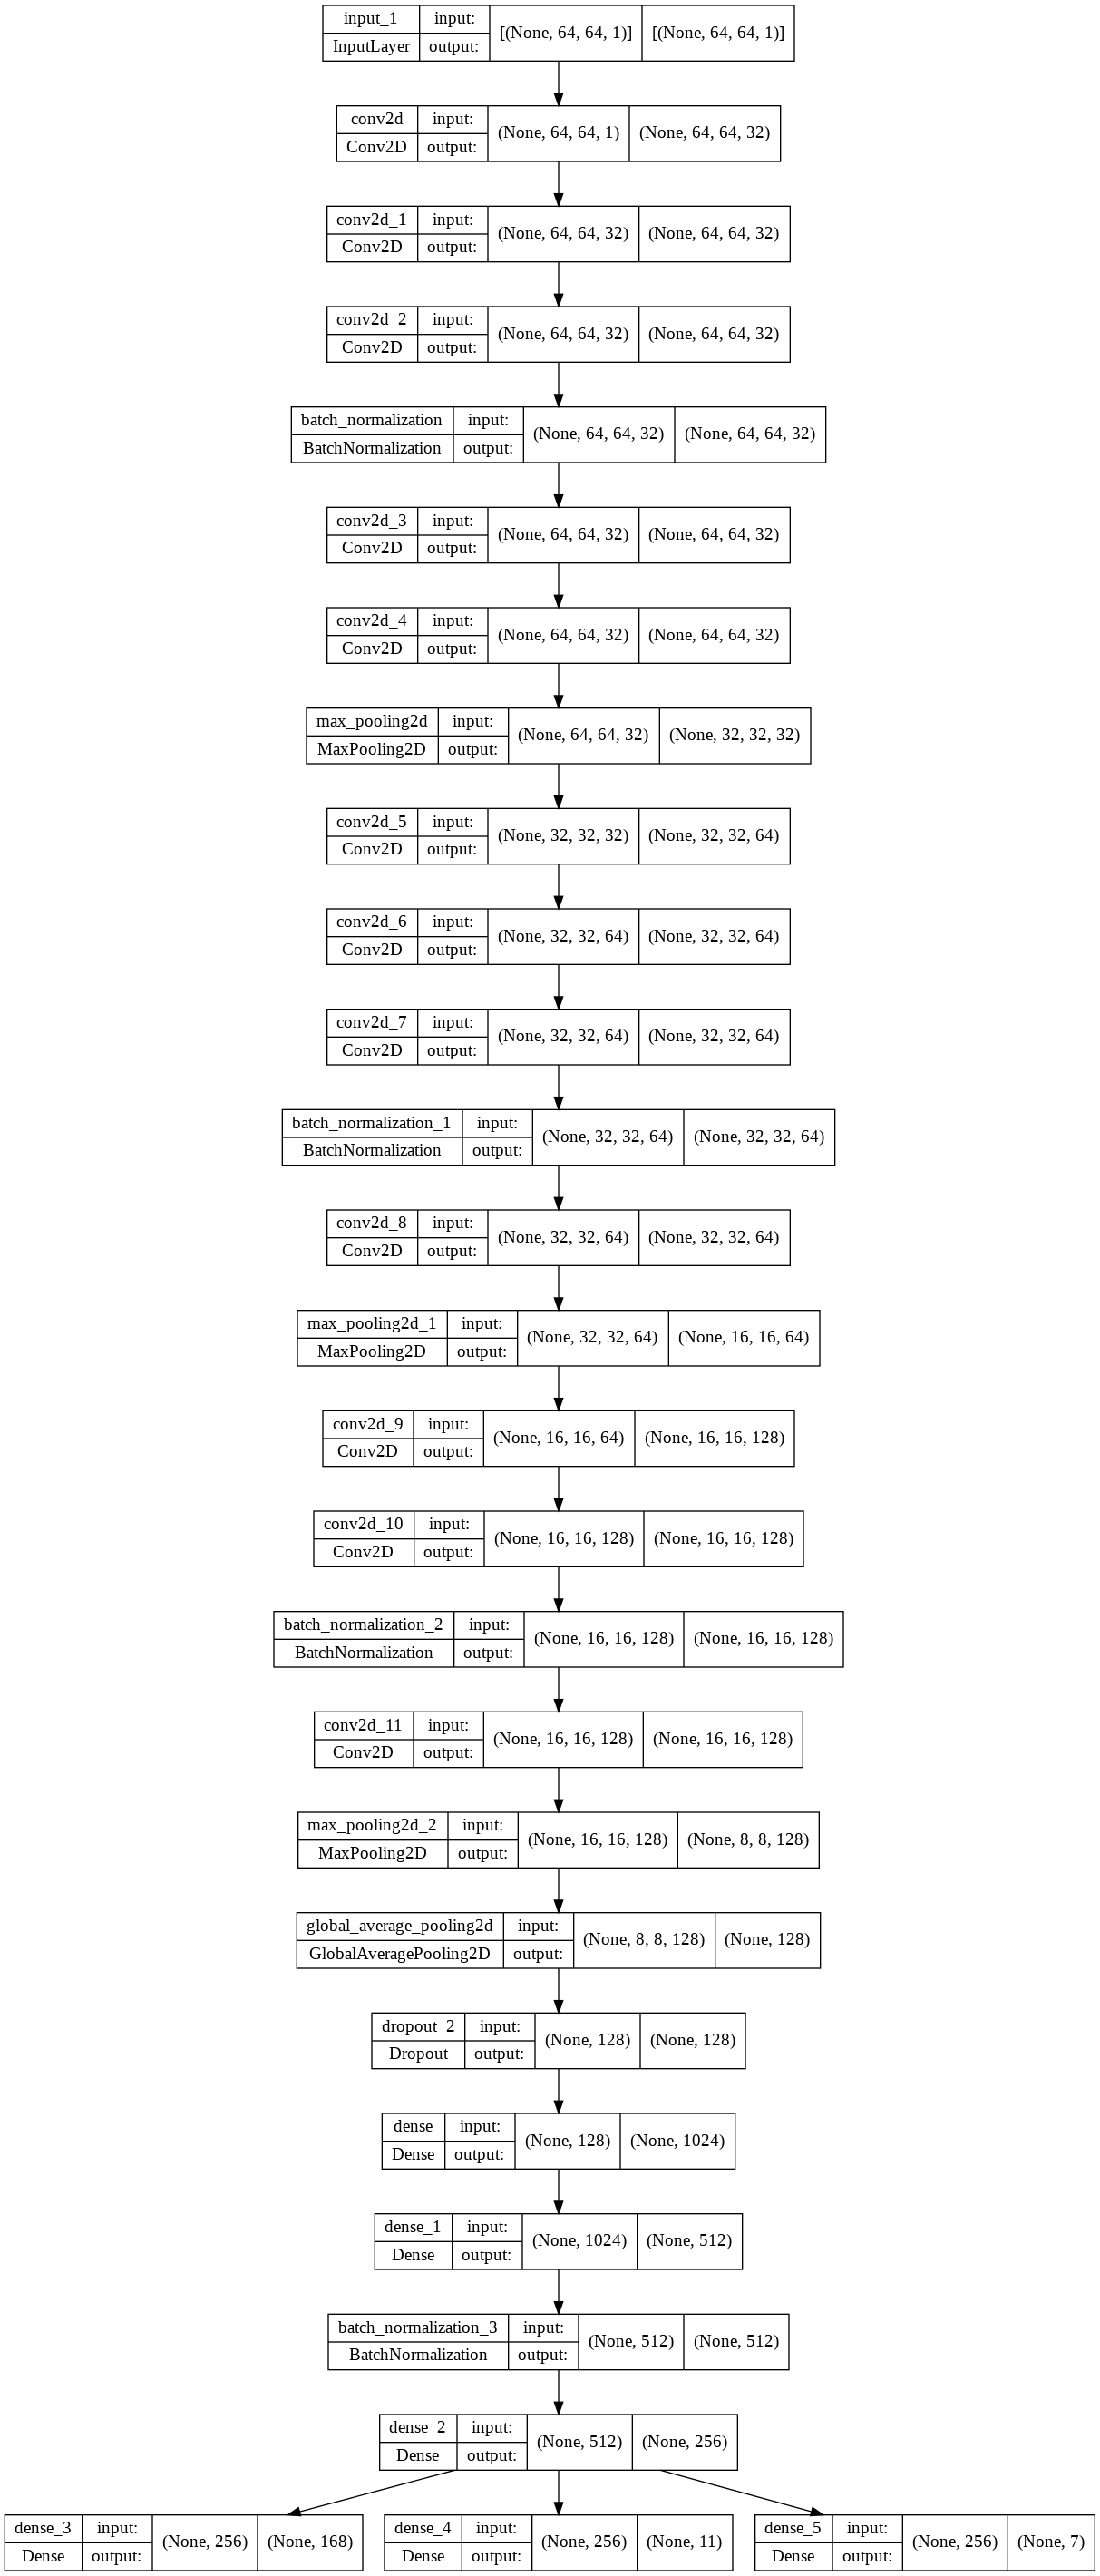

In [ ]:
keras.utils.plot_model(model_multi, "my_first_model_with_shape_info.png", show_shapes=True)


In [ ]:
model_multi.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [ ]:
model_multi.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 32)   832         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 64, 64, 32)   25632       ['conv2d[0][0]']                 
                                                                                                  
 conv2d_2 (Conv2D)              (None, 64, 64, 32)   9248        ['conv2d_1[0][0]']               
                                                                                              

In [ ]:
# training model
x_trn = np.zeros((20000,64,64), dtype = np.float16)
for i in range(10):
  base = i*20000
  for j in range(20000):
    x_trn[j] = np.asarray(X[base+j])
  x_trn = x_trn/255
  #y_trn = [label_layer_root[base:base+14999], label_layer_vowel[base:base+14999], label_layer_consonant[base:base+14999]]
  #y_val = [label_layer_root[base+15000:base+20000] ,label_layer_vowel[base+15000:base+20000],label_layer_consonant[base+15000:base+20000]]
  hist = model_multi.fit(x_trn[:14999],[label_layer_root[base:base+14999], label_layer2[base:base+14999], label_layer3[base:base+14999]], epochs = 30, batch_size = 200,
                  validation_data= (x_trn[15000:],[label_layer_root[base+15000:base+20000] ,label_layer2[base+15000:base+20000],label_layer3[base+15000:base+20000]]))

In [ ]:
model_multi.save('my_model_multi_30epochs.h5') 

In [ ]:
import tensorflow as tf
model2 = tf.keras.models.load_model('my_model_multi_30epochs.h5')

In [ ]:
import pickle
with open('trainHistoryDict', 'rb') as handle:
    hist = pickle.load(handle)


In [ ]:
print(hist.keys())

dict_keys(['loss', 'dense_3_loss', 'dense_4_loss', 'dense_5_loss', 'dense_3_accuracy', 'dense_4_accuracy', 'dense_5_accuracy', 'val_loss', 'val_dense_3_loss', 'val_dense_4_loss', 'val_dense_5_loss', 'val_dense_3_accuracy', 'val_dense_4_accuracy', 'val_dense_5_accuracy'])


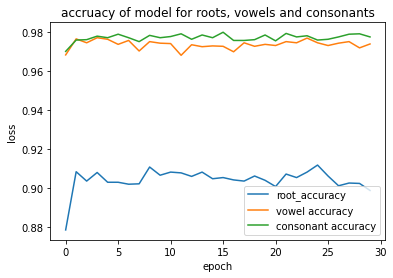

In [ ]:
import matplotlib
#plt.plot(hist['loss'])
plt.plot(hist['val_dense_3_accuracy'])
plt.plot(hist['val_dense_4_accuracy'])
plt.plot(hist['val_dense_5_accuracy'])
#plt.plot(hist['dense_3_loss'])
#plt.plot(hist.history['val_loss'])
plt.title('accruacy of model for roots, vowels and consonants')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend([ 'root_accuracy','vowel accuracy','consonant accuracy','val_dense_11_loss','val_loss'], loc='lower right')
plt.show()

In [ ]:
Y = X[200000:]
X_test = np.zeros((840,64,64),dtype = np.float16)
for i in range(840):
  X_test[i]=np.asarray(Y[i])
X_test = X_test/255
#model.predict(X_test)

In [ ]:
model.evaluate(X_test,[label_layer_root[200000:],label_layer2[200000:],label_layer3[200000:]],verbose = 1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


27/27 [==============================] - 3s 15ms/step - loss: 0.8047 - dense_9_loss: 0.4899 - dense_10_loss: 0.1467 - dense_11_loss: 0.1681 - dense_9_accuracy: 0.9131 - dense_10_accuracy: 0.9798 - dense_11_accuracy: 0.9679


[0.804738461971283,
 0.4899043142795563,
 0.14674067497253418,
 0.16809344291687012,
 0.913095235824585,
 0.9797618985176086,
 0.9678571224212646]

In [ ]:
img = out3.reshape(1,64,64)
img.shape
y1,y2,y3 = model2.predict(img)
y1_pred_labels = [np.argmax(i) for i in y1]
y2_pred_labels = [np.argmax(i) for i in y2]
y3_pred_labels = [np.argmax(i) for i in y3]
sum = []
sum.append(y1_pred_labels)
sum.append(y2_pred_labels)
sum.append(y3_pred_labels)
print(sum)

ch1 = df2.iloc[sum[0][0]]['component']
print("root letter: " + ch1)

ch2 = df2.iloc[sum[1][0]+168]['component']
print("vowel diacritic attached to root: " + ch2)

ch3 = df2.iloc[sum[2][0]+179]['component']
print("consonant diacritic attached to root: " + ch3)

ch = ''
if(ch1 != '0'):
  ch+=ch1
if(ch3!='0'):
  ch+=ch3
if(ch2 != '0'):
  ch+=ch2
print("The character in unicode: " + ch)

print("Input image :")
plt.matshow(out3)